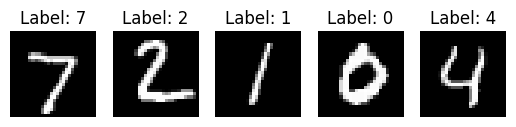

Epoch 1/5
938/938 [==============================] - 12s 11ms/step - loss: 0.1848 - accuracy: 0.9434
Epoch 2/5
938/938 [==============================] - 11s 11ms/step - loss: 0.0497 - accuracy: 0.9847
Epoch 3/5
938/938 [==============================] - 11s 11ms/step - loss: 0.0353 - accuracy: 0.9888
Epoch 4/5
938/938 [==============================] - 10s 11ms/step - loss: 0.0279 - accuracy: 0.9912
Epoch 5/5
313/313 [==============================] - 1s 3ms/step - loss: 0.0320 - accuracy: 0.9899
Test accuracy: 0.9898999929428101
1/1 [==============================] - 0s 152ms/step


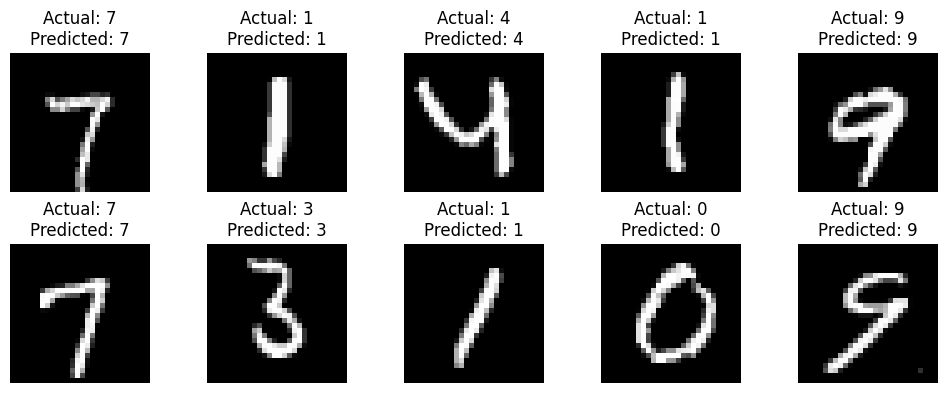

In [4]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import numpy as np

# Step 1: Load the MNIST dataset
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

num_images_to_show = 5  # Number of images you want to display

for i in range(num_images_to_show):
    plt.subplot(1, num_images_to_show, i + 1)
    plt.imshow(test_images[i], cmap='gray')
    plt.title(f'Label: {test_labels[i]}')
    plt.axis('off')
plt.show()

# Step 2: Preprocess the data by reshaping and normalizing
train_images = train_images.reshape((60000, 28, 28, 1)).astype('float32') / 255 # 60k images with a 3D shape of 28X28X1, then normalize [0,256] pixel
test_images = test_images.reshape((10000, 28, 28, 1)).astype('float32') / 255

# Convert labels to one-hot encoding
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

# Step 3: Build the CNN model
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

# Add Dense layers on top
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

# Step 4: Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Step 5: Train the model
model.fit(train_images, train_labels, epochs=5, batch_size=64)

# Step 6: Evaluate the model
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f'Test accuracy: {test_acc}')

# This code trains a CNN on the MNIST dataset for 5 epochs and reports the accuracy on the test set.

# Randomly pick 10 images from the test set, predict and display with actual labels
num_images = 10
random_indices = np.random.choice(test_images.shape[0], num_images)
random_test_images = test_images[random_indices]
random_test_labels = test_labels[random_indices]

predictions = model.predict(random_test_images)
predicted_labels = np.argmax(predictions, axis=1)
actual_labels = np.argmax(random_test_labels, axis=1)

# Display the images with actual and predicted labels
plt.figure(figsize=(10, 4))
for i in range(num_images):
    plt.subplot(2, 5, i+1)
    plt.imshow(random_test_images[i].reshape(28, 28), cmap='gray')
    plt.title(f'Actual: {actual_labels[i]}\nPredicted: {predicted_labels[i]}')
    plt.axis('off')
plt.tight_layout()
plt.show()